In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels as arima ## For Arima modeling 

In [2]:
file_path = "data\CMO-Historical-Data-Monthly.xlsx"




df = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4, engine='openpyxl')  
# print(df.head())



xls = pd.ExcelFile(file_path, engine='openpyxl')
# print(df.isnull().sum())
# To check for null or missing data

df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

df = df.drop([0, 1])
# Droped the names of $\bbl

df.replace('…', pd.NA, inplace=True)
# Alot of dotted values (missing) replaced with NA
df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
# df.fillna(0,inplace=True)

print(df.head(10))

# print(xls.sheet_names)
# To List all sheet names 

       Year  Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
2   1960M01                1.63              1.63              1.63   
3   1960M02                1.63              1.63              1.63   
4   1960M03                1.63              1.63              1.63   
5   1960M04                1.63              1.63              1.63   
6   1960M05                1.63              1.63              1.63   
7   1960M06                1.63              1.63              1.63   
8   1960M07                1.63              1.63              1.63   
9   1960M08                1.63              1.63              1.63   
10  1960M09                1.63              1.63              1.63   
11  1960M10                1.63              1.63              1.63   

    Crude oil, WTI  Coal, Australian  Coal, South African **  Natural gas, US  \
2             35.3               7.8                   29.34             0.14   
3             35.3               7.8                   2

C:\Users\pc\AppData\Local\Temp\ipykernel_18260\1428182255.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('…', pd.NA, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_18260\1428182255.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
C:\Users\pc\AppData\Local\Temp\ipykernel_18260\1428182255.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_

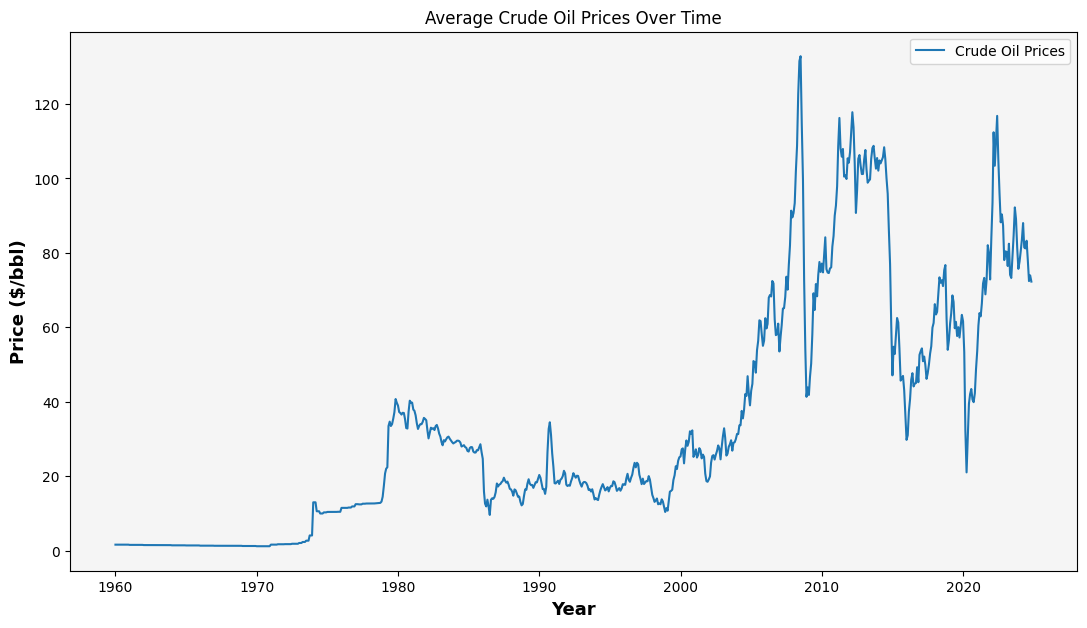

In [3]:
df['Date'] = pd.to_datetime(df['Year'], format='%YM%m') # Convert it to time instead of just shwoing numbers
df.set_index('Date', inplace=True) # Set Date column as index
plt.figure(figsize=(13,7))
plt.plot(df['Crude oil, average'], label='Crude Oil Prices')
plt.title('Average Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')

In [4]:
from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was above 0.05, therefore the series is not stationary

ADF Statistic: -1.7166884853092654
p-value: 0.4225352266727478
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is not stationary.


In [5]:
df['Crude oil, average'] = df['Crude oil, average'].diff()

from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'].dropna())

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was under 0.05, therefore the series is stationary

ADF Statistic: -12.874913291563438
p-value: 4.792077333919793e-24
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is stationary.


C:\Users\pc\AppData\Local\Temp\ipykernel_18260\2282467373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crude oil, average'].fillna(method='bfill', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_18260\2282467373.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Crude oil, average'].fillna(method='bfill', inplace=True)


ADF Statistic: -12.88330025447027
p-value: 4.609915318080246e-24
Critical Values:
   1%: -3.438837902109151
   5%: -2.8652862410999114
   10%: -2.568764869203001
The series is stationary.


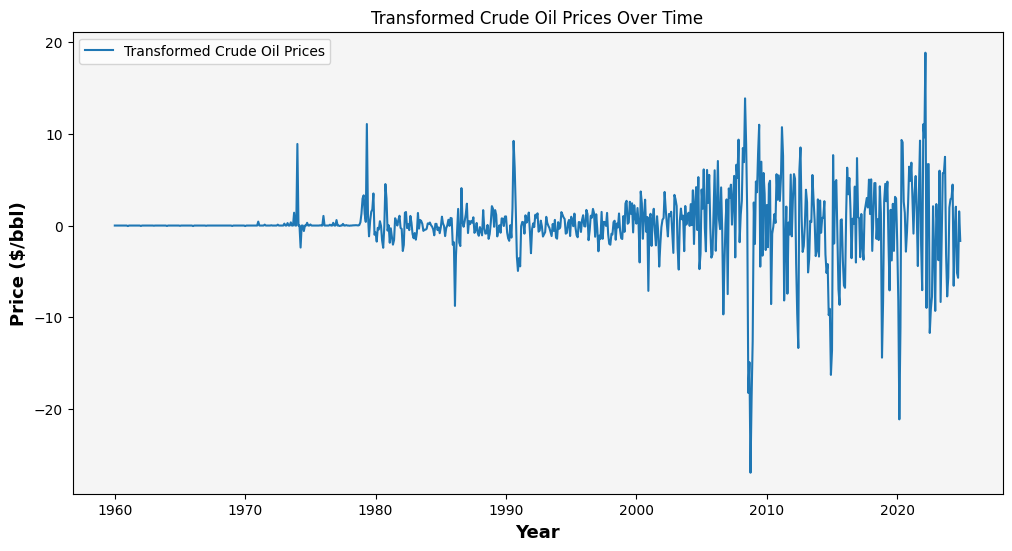

In [8]:
# Handle missing values
df['Crude oil, average'].fillna(method='bfill', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df['Crude oil, average'], label='Transformed Crude Oil Prices')
plt.title('Transformed Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')

# Rechecking if series is stationary after transformation

result = adfuller(df['Crude oil, average'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

Text(0.5, 1.0, 'ACF Plot')

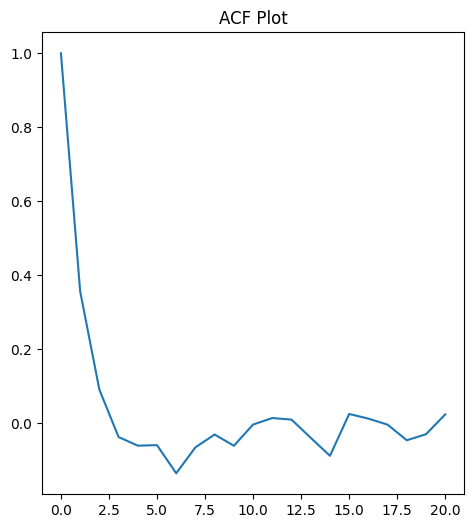

In [10]:
# ACF
    
from statsmodels.tsa.stattools import adfuller, acf, pacf
series = df['Crude oil, average'].dropna()

acf_values = acf(series, nlags=20)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf_values)
plt.title('ACF Plot')

Text(0.5, 1.0, 'PACF Plot')

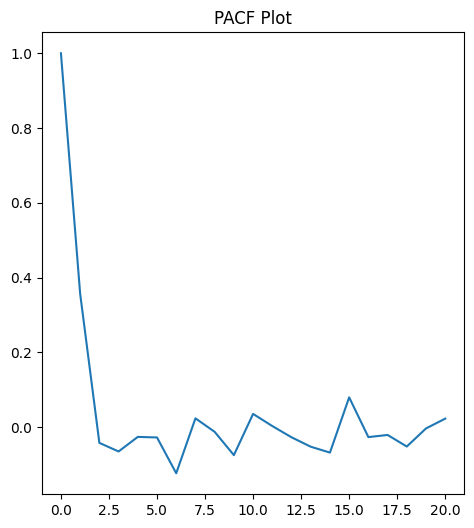

In [11]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(series, nlags=20)
plt.figure(figsize=(12, 6))
plt.subplot(122)
plt.plot(pacf_values)
plt.title('PACF Plot')

In [12]:
train_size = int(len(df) * 0.8)
train, test = df['Crude oil, average'][:train_size], df['Crude oil, average'][train_size:]

c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

                               SARIMAX Results                                
Dep. Variable:     Crude oil, average   No. Observations:                  623
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -1456.015
Date:                Sun, 12 Jan 2025   AIC                           2930.030
Time:                        18:22:17   BIC                           2969.941
Sample:                    01-01-1960   HQIC                          2945.540
                         - 11-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1661      0.104      1.596      0.111      -0.038       0.370
ar.L1          1.0527      1.064      0.989      0.322      -1.033       3.138
ar.L2         -0.0199      1.284     -0.016      0.9

C:\Users\pc\AppData\Local\Temp\ipykernel_18260\3685454138.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]


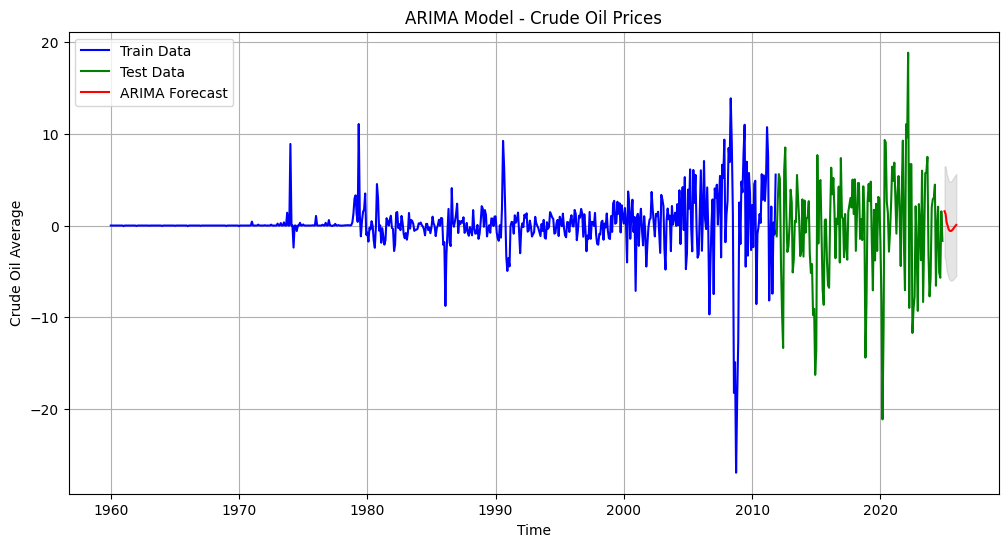

2011-12-01    1.563456
2012-01-01    1.254774
2012-02-01    0.354386
2012-03-01   -0.031242
2012-04-01   -0.440392
2012-05-01   -0.575579
2012-06-01   -0.605419
2012-07-01   -0.523253
2012-08-01   -0.388585
2012-09-01   -0.226998
2012-10-01   -0.069285
2012-11-01    0.068040
Freq: MS, Name: predicted_mean, dtype: float64
DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', freq='ME')


In [13]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(train, order=(5, 0, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Forecast
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Generate forecast index
last_date = test.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]




# Plot
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(forecast_index, forecast_mean, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)  # Confidence interval
plt.legend(loc='upper left')
plt.title('ARIMA Model - Crude Oil Prices')
plt.xlabel('Time')
plt.ylabel('Crude Oil Average')
plt.grid()
plt.show()

# Print forecasted values and index
print(forecast_mean)
print(forecast_index)



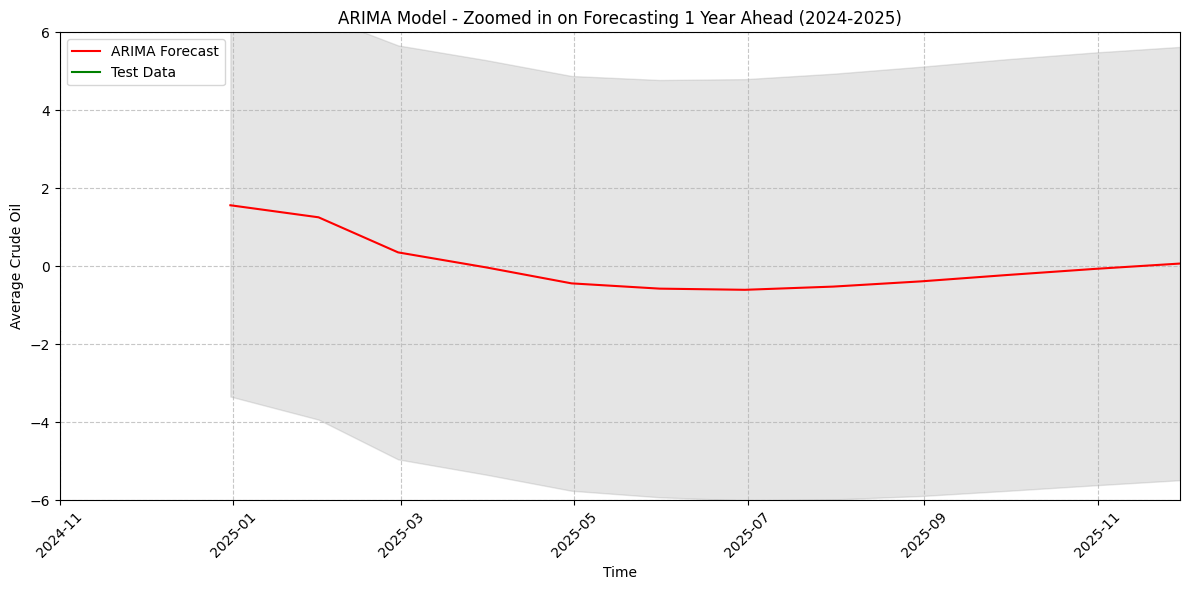

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(12, 6))


plt.plot(forecast_index, forecast_mean, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='gray', 
                 alpha=0.2)


plt.plot(test.index[-6:], test[-6:], label='Test Data', color='green')

# Set the zoom limits
plt.xlim(test.index[-1], forecast_index[-1])
# Dynamically set y-axis limits with some padding
y_min = -5
y_max = +5
padding = (y_max - y_min) * 0.1  # 10% padding
plt.ylim(y_min - padding, y_max + padding)


plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.title('ARIMA Model - Zoomed in on Forecasting 1 Year Ahead (2024-2025)')
plt.xlabel('Time')
plt.ylabel('Average Crude Oil')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forecast_mean_values = forecast.predicted_mean

# This ensures that both test and series have same length when being compared
test_values = test[:len(forecast_mean_values)]

mae = mean_absolute_error(test_values, forecast_mean_values)
rmse = np.sqrt(mean_squared_error(test_values, forecast_mean_values))
mape = np.mean(np.abs((test_values - forecast_mean_values) / test_values)) * 100
r2 = r2_score(test_values, forecast_mean_values)

In [19]:
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")
print(f"R-Squared: {r2:.2f}")


MAE: 5.162900532105071
RMSE: 6.179042174186942
MAPE: 108.20%
R-Squared: 0.04
